# Introduzione alla trasformata di Fourier

Notebook parte del percorso sull'introduzione del gafico di spettro di ampiezza per studenti di quarta che stanno affrontando lo studio delle onde e del suono.


* Sintesi a partire da **funzioni** armoniche
* Analisi con FFT (da libreria Numpy)


di Eugenio Tufino, Laboratorio di Comunicazione delle Scienze Fisiche dell’Università degli Studi di Trento
www.unitn.it, email: etufino@gmail.com


Nota bene: Salva una copia di questo file sul tuo Drive, aggiungendo il tuo nome.

In [25]:
# Import delle librerie python
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]  # dimensione grafici
from google.colab import files
import scipy
#from scipy import fftpack
#from scipy import signal

plt.rcParams['figure.figsize'] = [15, 7]  # parameters of figure


# Supponiamo di avere il seguente segnale **INCOGNITO** in funzione del tempo:

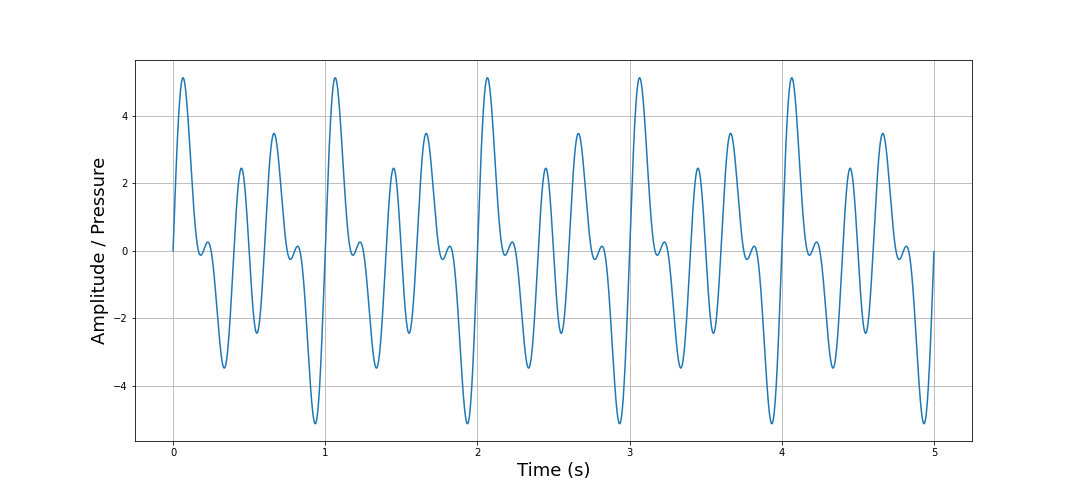

Consideriamo dei segnali dipendenti dal tempo del tipo:

 \begin{align}
        \text{segnale: } A\sin (&2\pi f t+\theta). \\[1em]
    \end{align}



## **Esempio**:

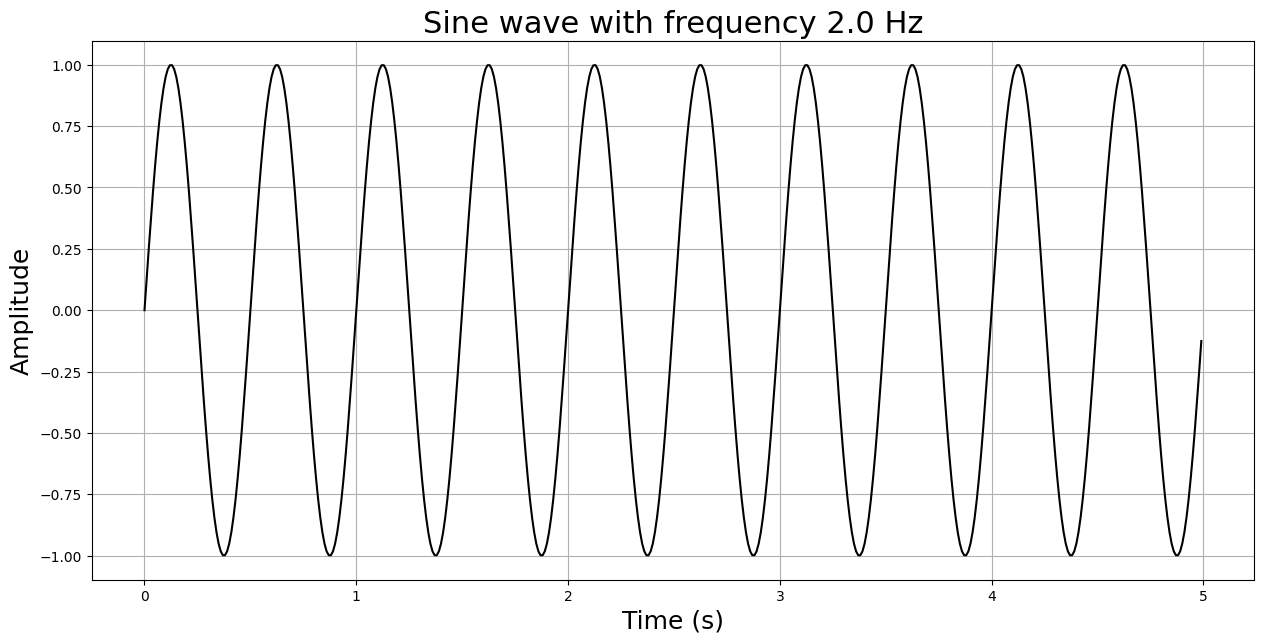

In [26]:
fs=100 # frequenza di campionamento per  ottenere il grafico numericamente
ts=1/fs # intervalli temporali
time = np.arange(0.,5,ts)  #  qui decidiamo intervallo sull'asse x - in questo caso tempo in (0,1)
f1 = 2  # frequenza f1
A1=1 # ampiezza
signal_tot=A1*np.sin(2*np.pi*f1*time)
#signal_tot=4*np.sin(2*np.pi*f_2*time)
plt.figure(figsize = (15, 7))
plt.plot(time, signal_tot, color='k',linestyle='-')
plt.xlabel('Time (s)',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)
plt.title("Sine wave with frequency {:.1f} Hz".format(f1), fontsize=22)
plt.savefig('sine_wave_plot.png',dpi=400, bbox_inches='tight')

plt.grid()

**Esercizio**: Scrivi come puoi verificare dal grafico che la frequenza è 2 Hz.

**Risposta studente:**



# Prova a ricostruire il segnale incognito proposto inizialmente sommando tre segnali a differenti frequenze f1, f2, f3 a tua scelta e, per semplicità,  con ampiezze assegnate A1, A2, A3 pari a 2.


In [27]:
"""
2#inserisci i valori delle frequenze f1,f2,f3 e relative ampiezze:
f1=float(input("Inserisci la frequenza f1:"))
f2=float(input("Inserisci la frequenza f2:"))
f3=float(input("Inserisci la frequenza f3:"))
"""
f1=5
f2=3
f3=2

In [28]:
3#Le ampiezza, minori di 5:
A1=0
A2=0
A3=2

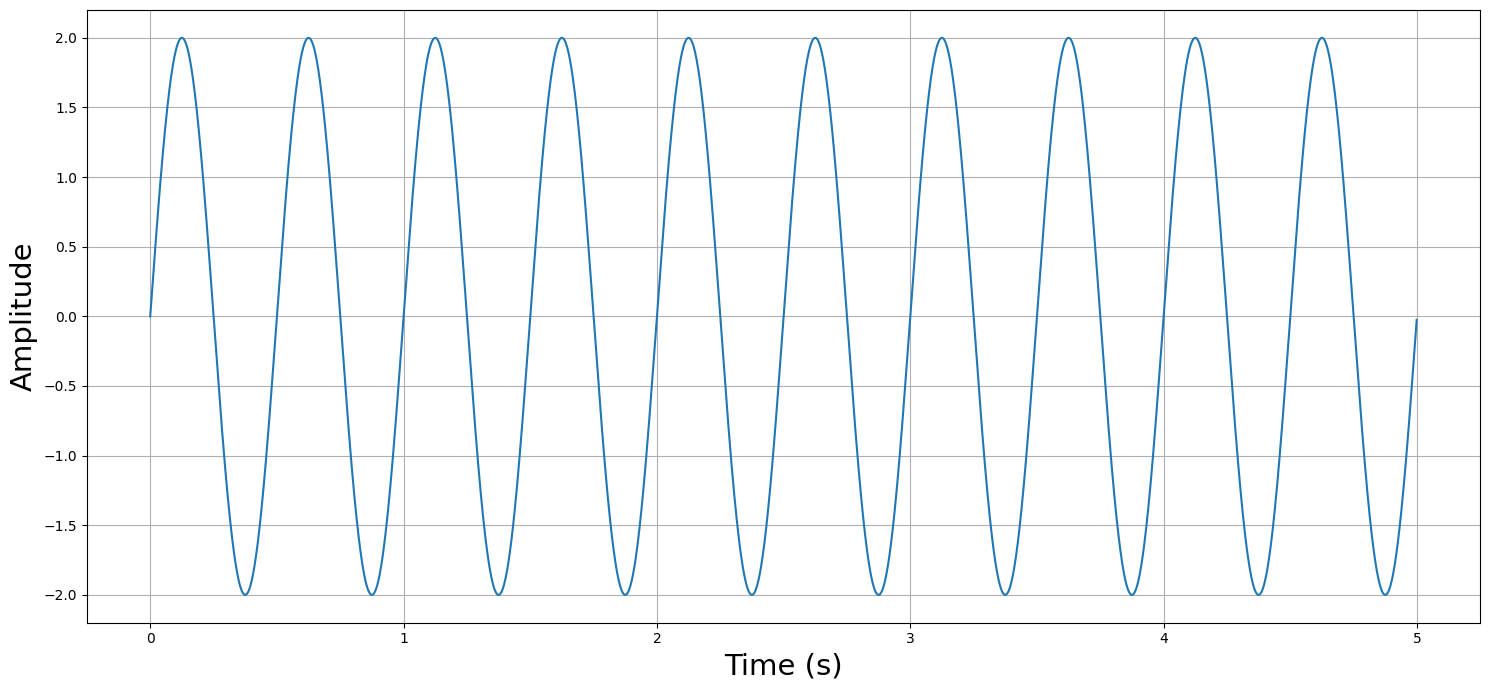

In [29]:
fs=1000 # sampling frequency
ts=1/fs
time = np.arange(0.,5,ts)  # specifico intervallo temporale
signal_tot=A1*np.sin(2*np.pi*f1*time)+A2*np.sin(2*np.pi*f2*time)+A3*np.sin(2*np.pi*f3*time)
#signal=A3*np.sin(2*np.pi*f3*time)  # per capitolo tesi
# sommo del rumore casuale al segnale
#signal_tot = signal_tot + 0.5*np.random.randn(len(time))   # introduciamo rumore casuale
#signal_tot=4*np.sin(2*np.pi*f_2*time)
plt.plot(time, signal_tot, linestyle='-')
plt.xlabel('Time (s)',fontsize=21)
plt.ylabel('Amplitude',fontsize=21)
#plt.title("Somma di tre sinusoidi con frequenze {:1.1f} Hz , {:1.1f} Hz, {:1.1f} Hz e \n ampiezze {:1.1f}, {:1.1f},{:1.1f}".format(f1,f2,f3,A1,A2,A3), fontsize=22)
#plt.title("Tasto ""1"" che corrisponde alla somma di due sinusoidi \n con frequenze {:1.1f} Hz , {:1.1f} Hz  e ampiezze unitarie".format(f1,f2), fontsize=21)
plt.grid()
plt.tight_layout()
plt.savefig("grafico con frequenze incognite2Hz.png")
#files.download("grafico con frequenze incognite.png")

### Esercizio: Riesci ad **identificare** le frequenze che vanno a comporre la funzione mostrata inizialmente (segnale incognito)?



### Risposta:

#Introduciamo del "rumore" nel segnale
### Tieni presente che nella realtà c'è sempre del "rumore" insieme al segnale. introduciamo ad esempio un rumore casuale nel seguente codice.

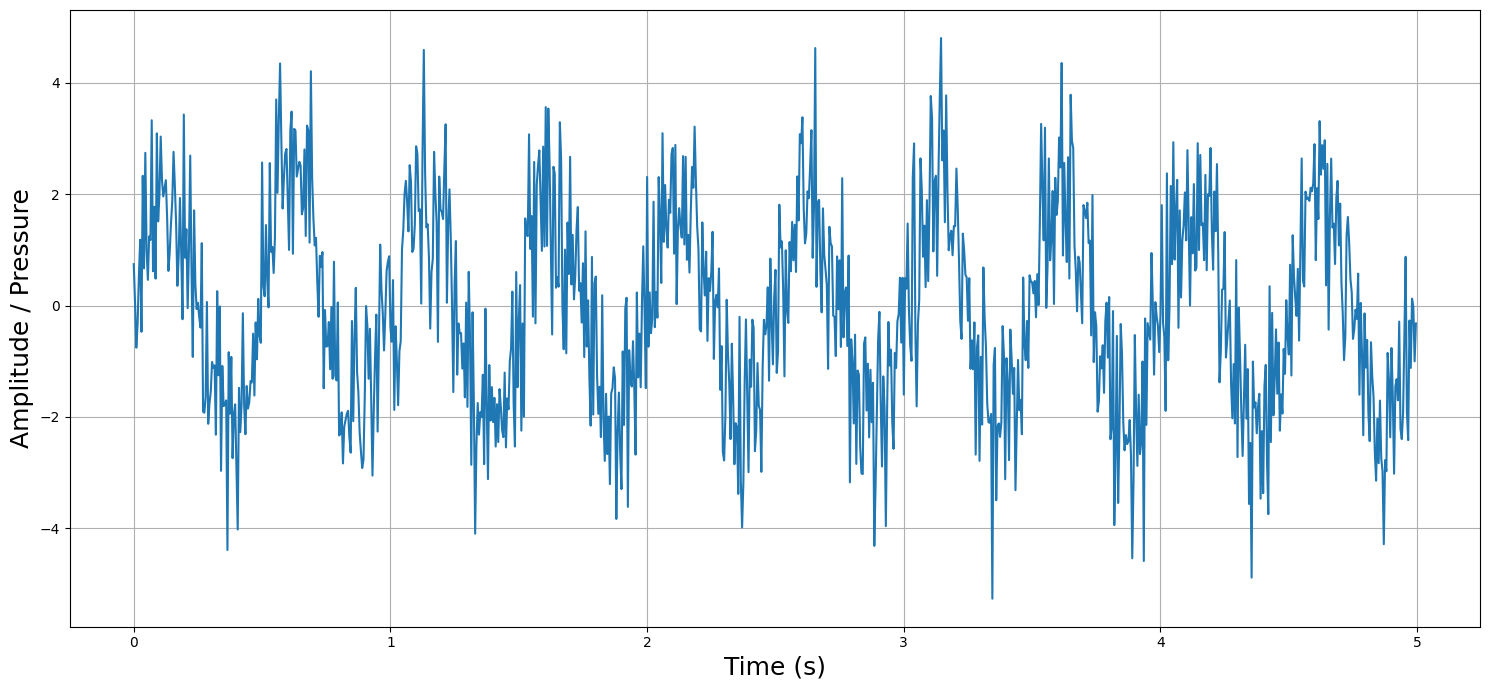

In [18]:
fs=200 # sampling frequency
ts=1/fs
time = np.arange(0.,5,ts)  # specifico intervallo temporale
signal_tot=A1*np.sin(2*np.pi*f1*time)+A2*np.sin(2*np.pi*f2*time)+A3*np.sin(2*np.pi*f3*time)
# sommo del rumore casuale al segnale
signal_tot = signal_tot + 1.0*np.random.randn(len(time))
#signal_tot=4*np.sin(2*np.pi*f_2*time)
plt.plot(time, signal_tot, linestyle='-')
plt.xlabel('Time (s)',fontsize=18)
plt.ylabel('Amplitude / Pressure',fontsize=18)
#plt.title("Somma di tre sinusoidi con frequenze {:1.1f} Hz , {:1.1f} Hz, {:1.1f} Hz e \n ampiezze {:1.1f}, {:1.1f},{:1.1f}".format(f1,f2,f3,A1,A2,A3), fontsize=22)
plt.grid()
plt.tight_layout()
plt.savefig("grafico con frequenze incognite_rumore.png")
#files.download("grafico con frequenze incognite.png")

## Spettro dell'ampiezza

Costruiamo il grafico chiamato spettro delle ampiezza, utilizzando la trasformata di Fourier.
Nel codice seguente definiamo questa trasformata utilizzando il codice Python.
Applichiamo la trasformata di Fourier per ottenere un grafico delle ampiezze in funzione delle frequenze

In [30]:
def Graficoalinee(fs,y,time,xmax=fs/2):
    Ts=1/fs
    spec   = np.fft.fft(y)#calcola FTT modulo Numpy
    spec   = np.abs(spec)/(0.5*len(time))#  calcola ampiezze normalizzate
    freq = np.fft.fftfreq(len(time),Ts) # calcola le frequenze relative [Hz]
    plt.figure(figsize = (15, 7))
    plt.stem(freq, spec,'b',markerfmt=" ", basefmt="-b",use_line_collection=True)#.................grafico ampiezza vs frequenza
    plt.xlim(0,10)
    plt.xlabel('Frequency (Hz)',fontsize=21)
    plt.ylabel('Amplitude',fontsize=21)
    #plt.title("Grafico ampiezze in frequenze con freq. di campionamento= {:1.1f} Hz".format(fs),fontsize=18)
    plt.grid()

    plt.tight_layout()
    plt.savefig("grafico ampiezza spettro con rumore2H.png")
    plt.show()

<ipython-input-19-88709525aafd>:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freq, spec,'b',markerfmt=" ", basefmt="-b",use_line_collection=True)#.................grafico ampiezza vs frequenza


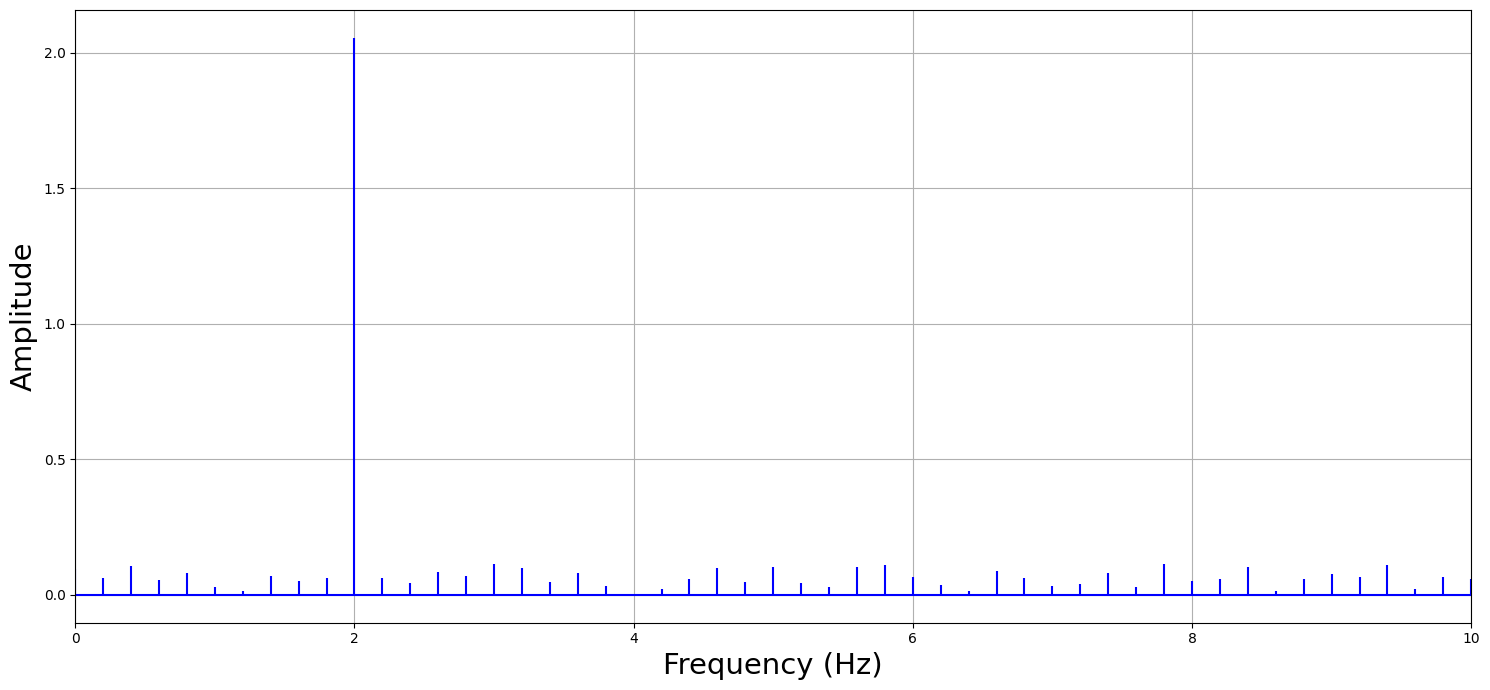

In [20]:
Graficoalinee(fs,signal_tot,time)

### Non vedi nulla? Prova a inserire un valore più piccolo di xmax nel comando in basso:
Graficoalinee(fs,signal_tot,time)

Ad esempio:

` Graficoalinee(fs,signal_tot,time, xmax=10)`

<ipython-input-30-88709525aafd>:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freq, spec,'b',markerfmt=" ", basefmt="-b",use_line_collection=True)#.................grafico ampiezza vs frequenza


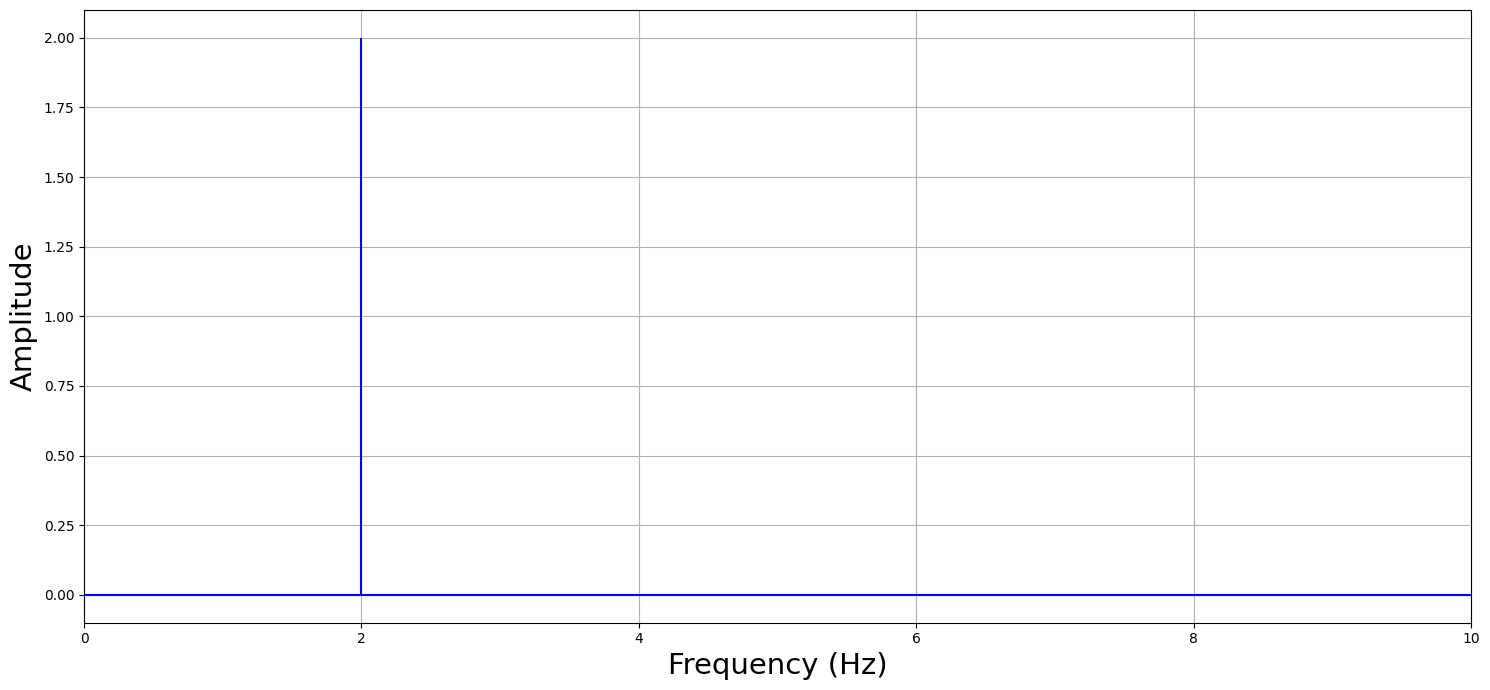

In [31]:
Graficoalinee(fs,signal_tot,time,xmax=10)

### Nota: Se hai inserito il segnale con "rumore" , compariranno nelle spettro di ampiezza anche delle ampiezze relative alle frequenze del rumore casuale introdotto.

### Spettro dell'ampiezza

In [32]:
def FourierBox(fs,y,time,xmin=0,xmax=fs/2):
    Ts=1/fs
    spec   = np.fft.fft(y)#calcola FTT modulo Numpy
    spec   = np.abs(spec)/(0.5*len(time))#  calcola ampiezze normalizzate
    freq = np.fft.fftfreq(len(time),Ts) # calcola le frequenze relative [Hz]
    plt.figure(figsize = (15, 7))
    plt.plot(freq, spec,'k')#.................grafico ampiezza vs frequenza
    plt.xlim(xmin,xmax)
    #plt.ylim(0,2*np.max(spec))
    plt.xlabel('Frequency (Hz)',fontsize=20)
    plt.ylabel('Amplitude',fontsize=20)
    #plt.title("Amplitude spectrum with sampling frequency fs= {:1.1f} Hz".format(fs),fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.grid()
    plt.tight_layout()
    plt.savefig('amplitudespectrum_plot.png',dpi=400, bbox_inches='tight')

    plt.show()
#    return len(freq)
    return

In [23]:
fs

200

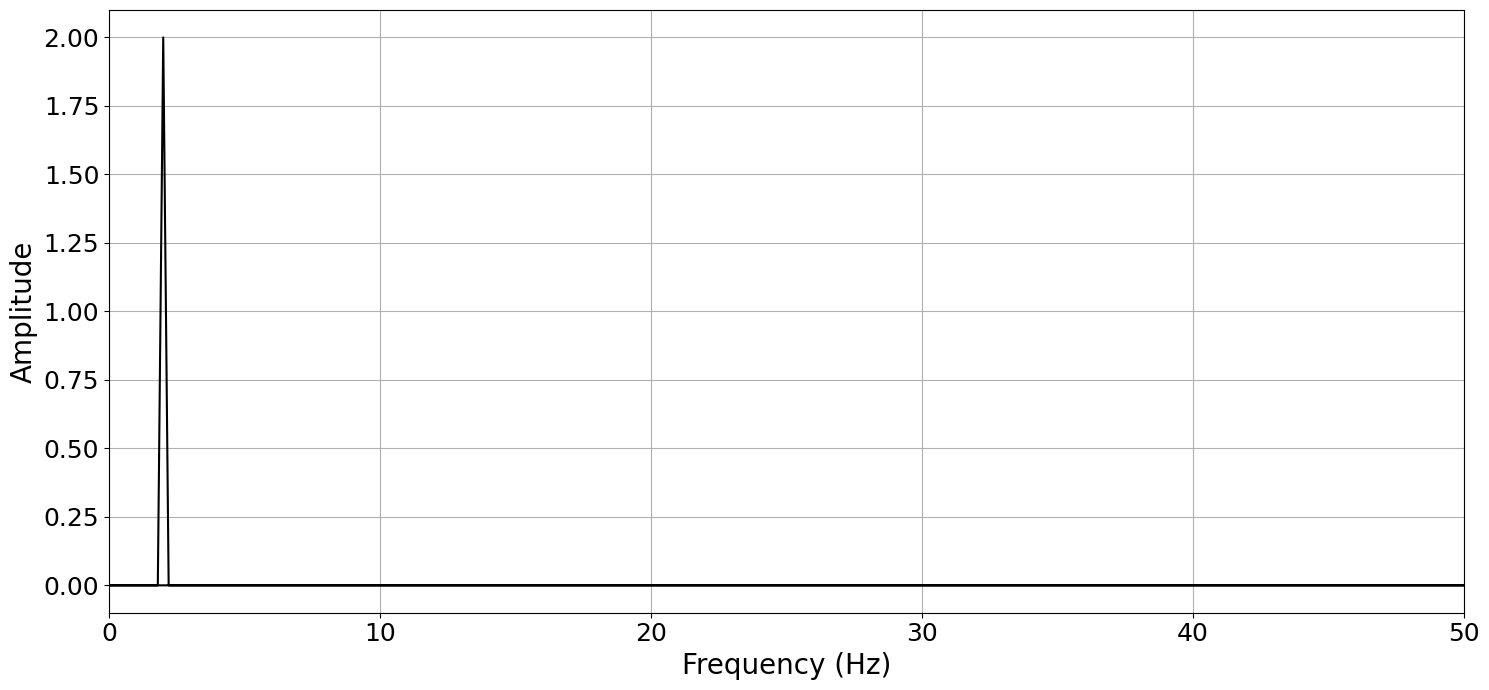

In [33]:
# grafico tra 0 e xnax
FourierBox(fs,signal_tot,time,xmax=50)